# Stability

The general transfer function is given as

$$
G(s) = \frac{Y(s)}{U(s)} = \frac{b_{0} + b_{1} ~ s + b_{2} s^2 + \cdots + b_{n} ~ s^{n} }{a_{0} + a_{1} ~ s + a_{2} s^2 + \cdots + a_{m} ~ s^{m}}
$$

with coefficients $ a_{i}, b_{j} \in \mathbb{R} $ and $ i \in \left\{0,1,\cdots, m\right\}$, $ j \in \left\{0,1,\cdots, n\right\} $, and the Laplace transformed system output $Y(s)$ and input $U(s)$. The system state $X(s)$ is used often instead of the system output $Y(s)$. 

The transfer function is called 

- Proper if $ n \leq m $,
- Strictly proper if $ n < m $ and
- Not proper if $ n > m $.

Here, only (strictly) proper systems are discussed because they are technically relevant. 

The roots of the numerator are called **zeros**

$$
b_{0} + b_{1} ~ s + b_{2} s^2 + \cdots + b_{n} ~ s^{n} = 0
$$

and the roots of the denominator are called **poles**

$$
a_{0} + a_{1} ~ s + a_{2} s^2 + \cdots + a_{m} ~ s^{m} = 0 \text{.}
$$

The zeros have impact on the property of [minimum phase](https://en.wikipedia.org/wiki/Minimum_phase) and the zero dynamics of a system. The zero dynamics is the internal dynamics of a system while the output is measured as zero. However, the position of the zeros are not very important for the basics of Control Engineering. 

The poles are crucial for the stability of a dynamical system. 
- If the real part of **all poles** are **smaller** than zero, then the system is called bounded-input-bounded-output (BIBO) **stable**. 
- If the real part of **any pole** is **greater** than zero, then the system is called **unstable**. 
- If the real part of **any pole** is **equal** to zero, then the system is called **marginally stable**. 

The last case is common for open loop systems with an integrator. The dynamics and especially the output $y(t)$ of a stable system will not tend to infinity for any bounded (or limited) input - or mathematical written

$$
\lvert y(t) \rvert < \infty ~ \text{for all} ~ t \geq 0 \text{.} 
$$

### Example: Unstable Systems

The transfer functions 

$$
G_{1}(s) = \frac{s + 1}{s - 8} \quad \text{and} \quad
G_{2}(s) = \frac{1}{s^2 + a~s + b}
$$
are assumed. 

The first system $G_{1}$ has one zero root at $ s = -1 $ and one pole at $ s = 8 $. This pole is greater than zero and thus system $G_{1}$ is unstable.

The second system $G_{2}$ has no zeros and two poles 

$$
s_{1,2} = \frac{-a}{2} \pm \frac{1}{2} \sqrt{a^2 - 4~b} \text{.}
$$

If $ a < 0 $ or $ b < 0 $ then this system has one pole smaller than zero and one pole greater than zero and thus system $G_{2}$ is unstable. For example, the values are chosen as $a = 2$ and $b = -3$ and therefore one yields $s_{1} = -3$ and $s = 1$.

System $G_{2}(s)$ is simulated below with the final simulation time $T = 5$ seconds.

In [4]:
using ControlSystems
a = 2; # Parameters
b = -3;
G_2 = tf(1, [1, a, b]) # Transfer function of second order system

TransferFunction{ControlSystems.SisoRational{Int64}}
      1
-------------
s^2 + 2*s - 3

Continuous-time transfer function model

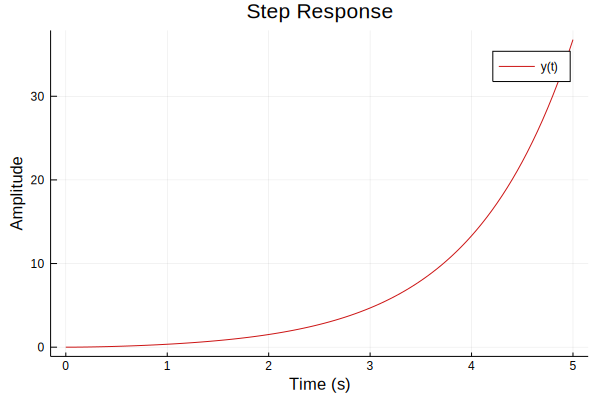

In [5]:
Tf = 5; # Final simulation time
stepplot(G_2, Tf, label="y(t)")

## Marginally stable Systems

Integrator blocks $G_{I}(s) = \frac{1}{s}$ are often used to minimize the (steady-state) error $e(t) = r(t) - y(t)$ between reference $r(t)$ and system output $y(t)$ - see also [PID controller](https://en.wikipedia.org/wiki/PID_controller). The series connection of an integrator and a classical n-th order system will lead to an open loop system with one pole at zero.

### Example: Integrator

The stable system 

$$
G_{st}(s) = \frac{1}{s^2 + 2s + 10} 
$$

has conjugated-complex poles at $ s_{1,2} = -1.0 \pm 3.0j $. The series connection of $G_{st}(s)$ and $G_{I}(s)$ leads to 
$$
G_{m}(s) = G_{I}(s) ~ G_{st}(s) =  \frac{1}{s(s^2 + 2s + 10)} \text{.}
$$

The system $G_{m}(s)$ has three poles at $s_{1} = 0$ and $ s_{2,3} = -1.0 \pm 3.0j $ and consequently it is *only* marginally stable. It will be shown in a subsequent section that an integrator is useful to  design feedback loops.

### Example: Conjugated-complex Pole

The second order system
$$
G_{cc}(s) = \frac{1}{s^2 + a~s + b} 
$$
can be marginally stable, if $ a = 0 $ and $b > 0$. For example, if $b = 4$ is chosen, then the pure conjugated-complex poles are $s_{1,2} = \pm 2.0j$. 

System $G_{cc}(s)$ is simulated below.


In [2]:
using ControlSystems
b = 4; # Parameter
G_cc = tf(1, [1, 0, b]) # Transfer function of second order system

TransferFunction{ControlSystems.SisoRational{Int64}}
   1
-------
s^2 + 4

Continuous-time transfer function model

The final simulation time is chosen as $T = 5$ seconds and the input is given as a step function.

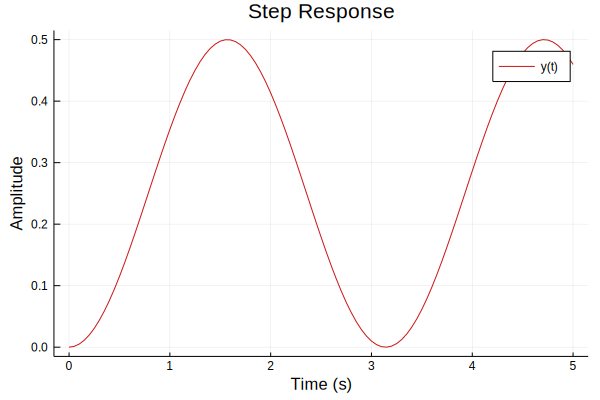

In [3]:
Tf = 5; # Final simulation time
stepplot(G_cc, Tf, label="y(t)")

The pure complex poles lead to a oscillating behaviour of the step response without in- or decrease.  